# CNNs for image classification

### setup

In [1]:
import sys
import sklearn
from sklearn.model_selection import train_test_split

import numpy as np
import os, time
import pandas as pd

import tensorflow as tf
from tensorflow import keras


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

## 1. Load data

Using the built in dataset fashion mnist.

In [2]:
fmnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fmnist.load_data()

In [3]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#split the val set and train set with 80% and 20%
X_test = X_test/255.0
X_valid, X_train = X_train_full[:12000]/255.0, X_train_full[12000:]/255.0
y_valid, y_train = y_train_full[:12000], y_train_full[12000:]
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_valid = X_valid.reshape(-1,28,28,1)
class_names = np.array([ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , 
               "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ])
print(f'train set shape: {X_train.shape}')
print(f'train label set shape: {y_train.shape}')
print(f'test set shape: {X_test.shape}')
print(f'test label set shape: {y_test.shape}')
print(f'validation set shape: {X_valid.shape}')
print(f'validation label set shape: {y_valid.shape}')


train set shape: (48000, 28, 28, 1)
train label set shape: (48000,)
test set shape: (10000, 28, 28, 1)
test label set shape: (10000,)
validation set shape: (12000, 28, 28, 1)
validation label set shape: (12000,)


In [5]:
label  =  np.unique(y_train)
label

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

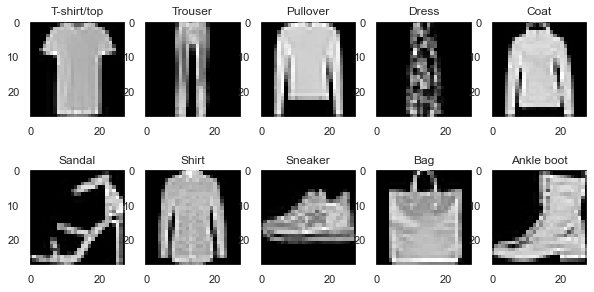

In [6]:
#show the class of fashion clothing
plt.figure(figsize=(10,5))
for i in label:
    plt.subplot(2,5,i+1)
    n = np.argmax(y_train == i)
    plt.imshow(X_train[n,:,:], cmap='gray')
    plt.title(class_names[y_train[n]])
    plt.grid(False)
plt.show()

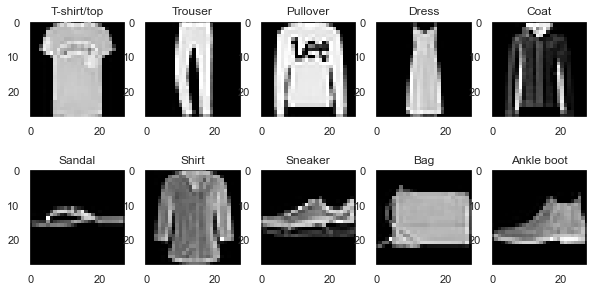

In [7]:
plt.figure(figsize=(10,5))
for i in label:
    plt.subplot(2,5,i+1)
    n = np.argmax(y_test == i)
    plt.imshow(X_test[n,:,:], cmap='gray')
    plt.title(class_names[y_test[n]])
    plt.grid(False)
plt.show()

## 2. Models

### 2.1 MLP

In [8]:
mlp = keras.models.Sequential()   # This is a style of building networks - the easiest option
mlp.add(keras.layers.Flatten(input_shape = [28 , 28])) 
mlp.add(keras.layers.Dense(400, activation = "relu"))    # first hidden layer
mlp.add(keras.layers.Dense(200, activation = "relu"))    # second hidden layer
mlp.add(keras.layers.Dense(10, activation = "softmax"))  # output layer
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


2022-10-28 03:55:43.428252: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
mlp.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = mlp.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7384 - accuracy: 0.7635 - val_loss: 0.5273 - val_accuracy: 0.8184
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4970 - accuracy: 0.8282 - val_loss: 0.4764 - val_accuracy: 0.8343
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4507 - accuracy: 0.8426 - val_loss: 0.4310 - val_accuracy: 0.8532
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4221 - accuracy: 0.8523 - val_loss: 0.4371 - val_accuracy: 0.8484
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4018 - accuracy: 0.8599 - val_loss: 0.4452 - val_accuracy: 0.8447
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3840 - accuracy: 0.8649 - val_loss: 0.3871 - val_accuracy: 0.8634
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3694 - accuracy: 0.8695 - val_loss: 0.3641 - val_accuracy:

In [10]:
test_result = mlp.evaluate(X_test, y_test, verbose=0)
print(test_result) #loss and accuracy

[0.3415195047855377, 0.8801000118255615]


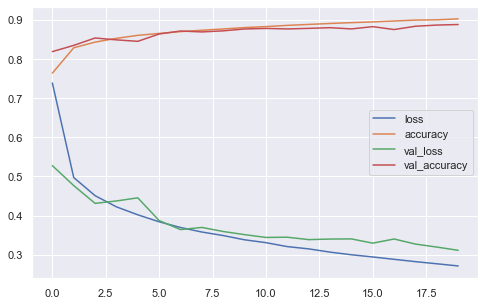

In [11]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.show()

In [13]:
predict_x = mlp.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)
print(y_pred)   # predicted classes
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, target_names=class_names, digits=4))


313/313 [==============================] - 1s 2ms/step
[9 2 1 ... 8 1 5]
              precision    recall  f1-score   support

 T-shirt/top     0.7971    0.8800    0.8365      1000
     Trouser     0.9760    0.9740    0.9750      1000
    Pullover     0.8157    0.7880    0.8016      1000
       Dress     0.8878    0.8700    0.8788      1000
        Coat     0.7639    0.8510    0.8051      1000
      Sandal     0.9752    0.9440    0.9593      1000
       Shirt     0.7518    0.6270    0.6838      1000
     Sneaker     0.9279    0.9400    0.9339      1000
         Bag     0.9669    0.9630    0.9649      1000
  Ankle boot     0.9387    0.9640    0.9512      1000

    accuracy                         0.8801     10000
   macro avg     0.8801    0.8801    0.8790     10000
weighted avg     0.8801    0.8801    0.8790     10000



### 2.2 CNN

In [15]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same",
                               input_shape=[28, 28, 1]))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
cnn.add(keras.layers.AveragePooling2D(pool_size=2))
cnn.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
cnn.add(keras.layers.AveragePooling2D(pool_size=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(10, activation = "softmax"))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 average_pooling2d_2 (Averag  (None, 7, 7, 32)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 average_pooling2d_3 (Averag  (None, 3, 3, 64)        

In [16]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = cnn.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.6147 - accuracy: 0.7754 - val_loss: 0.4589 - val_accuracy: 0.8357
Epoch 2/20
1500/1500 [==============================] - 41s 27ms/step - loss: 0.3997 - accuracy: 0.8544 - val_loss: 0.3581 - val_accuracy: 0.8712
Epoch 3/20
1500/1500 [==============================] - 37s 24ms/step - loss: 0.3434 - accuracy: 0.8758 - val_loss: 0.3174 - val_accuracy: 0.8852
Epoch 4/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.3099 - accuracy: 0.8887 - val_loss: 0.3070 - val_accuracy: 0.8882
Epoch 5/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2887 - accuracy: 0.8970 - val_loss: 0.2746 - val_accuracy: 0.9005
Epoch 6/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2711 - accuracy: 0.9017 - val_loss: 0.2935 - val_accuracy: 0.8916
Epoch 7/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2568 - accuracy: 0.9072 - val_loss: 0.2771 -

In [18]:
test_result = cnn.evaluate(X_test, y_test, verbose=0)
print(test_result) #loss and accuracy

[0.2535201609134674, 0.9140999913215637]


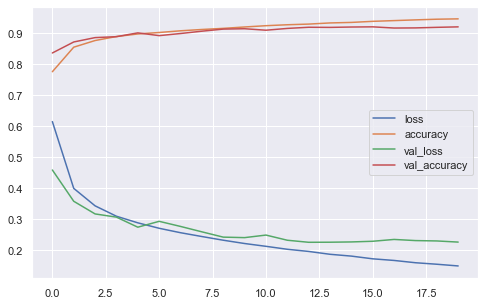

In [19]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.show()

In [20]:
predict_x = cnn.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)
print(y_pred)   # predicted classes
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, target_names=class_names, digits=4))


313/313 [==============================] - 2s 7ms/step
[9 2 1 ... 8 1 5]
              precision    recall  f1-score   support

 T-shirt/top     0.8661    0.8600    0.8630      1000
     Trouser     0.9880    0.9840    0.9860      1000
    Pullover     0.8562    0.8990    0.8771      1000
       Dress     0.8743    0.9460    0.9087      1000
        Coat     0.8846    0.8280    0.8554      1000
      Sandal     0.9870    0.9860    0.9865      1000
       Shirt     0.7761    0.7210    0.7475      1000
     Sneaker     0.9417    0.9860    0.9634      1000
         Bag     0.9791    0.9850    0.9821      1000
  Ankle boot     0.9834    0.9460    0.9643      1000

    accuracy                         0.9141     10000
   macro avg     0.9136    0.9141    0.9134     10000
weighted avg     0.9136    0.9141    0.9134     10000



### 2.3 ResNet

In [21]:
#code from UMLT workshop11 
#https://github.com/billhhh/UMLT/blob/main/Workshop11/workshop11_answer.ipynb
class ResidualUnit (keras.layers.Layer): 
    def __init__ (self, filters, strides=1, activation="relu", **kwargs): 
        super(). __init__ (**kwargs) 
        self.activation = keras.activations.get(activation) 
        self.main_layers = [ 
            keras.layers.Conv2D(filters, 3, strides=strides, 
                                padding="same", use_bias=False), 
            keras.layers.BatchNormalization(), 
            self.activation, 
            keras.layers.Conv2D(filters, 3, strides=1, 
                                padding="same", use_bias=False), 
            keras.layers.BatchNormalization()] 
        self.skip_layers = [] 
        if strides > 1: 
            self.skip_layers = [ 
                keras.layers.Conv2D(filters, 1, strides=strides, 
                                    padding="same", use_bias=False), 
                keras.layers.BatchNormalization()] 
            
    def call(self, inputs): 
        Z = inputs 
        for layer in self.main_layers: 
            Z = layer(Z) 
        skip_Z = inputs 
        for layer in self.skip_layers: 
            skip_Z = layer(skip_Z) 
        return self.activation(Z + skip_Z)

In [27]:
initial_filters=32
residual_unit_filters=[32, 64, 128]

resnet = keras.models.Sequential() 
resnet.add(keras.layers.Conv2D(initial_filters, 7, strides=2, 
                              input_shape=[28, 28, 1], 
                              padding="same", use_bias=False))
resnet.add(keras.layers.BatchNormalization()) 
resnet.add(keras.layers.Activation("relu")) 
resnet.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same")) 

prev_filters = initial_filters
for filters in residual_unit_filters: 
    if filters == prev_filters: 
        strides = 1
    else:
        strides = 2
    resnet.add(ResidualUnit(filters, strides=strides)) 
    prev_filters = filters 
    
resnet.add(keras.layers.GlobalAvgPool2D()) 
resnet.add(keras.layers.Flatten()) 
resnet.add(keras.layers.Dense(10, activation="softmax"))

resnet.compile(loss="sparse_categorical_crossentropy", 
              optimizer = "sgd", 
              metrics=["accuracy"])   

# Output the model summary
resnet.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_29 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 residual_unit_9 (ResidualUn  (None, 7, 7, 32)         18688     
 it)                                                             
                                                      

In [28]:
history = resnet.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
1500/1500 [==============================] - 59s 38ms/step - loss: 0.4899 - accuracy: 0.8297 - val_loss: 0.3533 - val_accuracy: 0.8736
Epoch 2/20
1500/1500 [==============================] - 50s 33ms/step - loss: 0.3321 - accuracy: 0.8772 - val_loss: 0.3416 - val_accuracy: 0.8762
Epoch 3/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2880 - accuracy: 0.8950 - val_loss: 0.3124 - val_accuracy: 0.8826
Epoch 4/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2606 - accuracy: 0.9052 - val_loss: 0.2961 - val_accuracy: 0.8911
Epoch 5/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2381 - accuracy: 0.9120 - val_loss: 0.2578 - val_accuracy: 0.9051
Epoch 6/20
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2207 - accuracy: 0.9192 - val_loss: 0.2749 - val_accuracy: 0.9003
Epoch 7/20
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2057 - accuracy: 0.9265 - val_loss: 0.2883 -

In [30]:
test_result = resnet.evaluate(X_test, y_test, verbose=0)
print(test_result) #loss and accuracy

[0.33389443159103394, 0.8956000208854675]


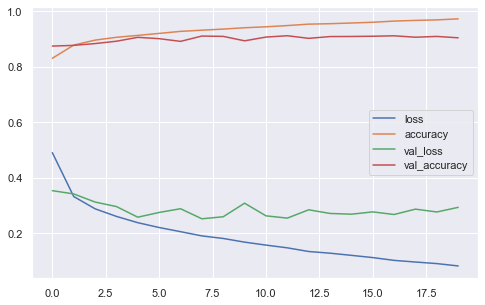

In [31]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.show()

In [32]:
predict_x = resnet.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)
print(y_pred)   # predicted classes
print(classification_report(y_test,y_pred, target_names=class_names, digits=4))


313/313 [==============================] - 2s 6ms/step
[9 2 1 ... 8 1 7]
              precision    recall  f1-score   support

 T-shirt/top     0.8465    0.8550    0.8507      1000
     Trouser     0.9919    0.9810    0.9864      1000
    Pullover     0.7523    0.8870    0.8141      1000
       Dress     0.9355    0.8850    0.9096      1000
        Coat     0.8361    0.7550    0.7935      1000
      Sandal     0.9866    0.9550    0.9705      1000
       Shirt     0.7390    0.7190    0.7288      1000
     Sneaker     0.9297    0.9790    0.9537      1000
         Bag     0.9849    0.9790    0.9819      1000
  Ankle boot     0.9756    0.9610    0.9683      1000

    accuracy                         0.8956     10000
   macro avg     0.8978    0.8956    0.8958     10000
weighted avg     0.8978    0.8956    0.8958     10000



## 3. Optimisation

In [55]:
# parameters
n_train = 24000
n_valid = 6000
hiddensizes = [16, 32, 16]
actfn = "relu"
optimizer = keras.optimizers.SGD
learningrate = 0.01 
batch_size = 32
n_epochs = 20
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 

In [42]:
def fit_evaluate(model, n_train, n_valid, n_epochs, batch_size, callbacks=[]):
    history = model.fit(X_train[:n_train,:,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_valid[:n_valid,:,:,:], y_valid[:n_valid]),verbose=1)
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(X_test, y_test, verbose=0)
    return (max_val_acc, testres[1], history, model)

In [49]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.show() 

### 3.1 MLP

In [38]:
def mlp_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28, 28, 1]))    
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
    model.add(keras.layers.Dense(10, activation = "softmax"))   
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [47]:
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = mlp_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train[:n_train,:,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_valid[:n_valid,:,:,:], y_valid[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(X_test, y_test, verbose=0)
    return (max_val_acc, testres[1], history, model)

#### Hiddensizes

Number of Layers = 1
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 1.1831 - accuracy: 0.6177 - val_loss: 0.7627 - val_accuracy: 0.7412
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6967 - accuracy: 0.7590 - val_loss: 0.6395 - val_accuracy: 0.7860
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6078 - accuracy: 0.7934 - val_loss: 0.5837 - val_accuracy: 0.8052
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5591 - accuracy: 0.8085 - val_loss: 0.5369 - val_accuracy: 0.8202
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5281 - accuracy: 0.8185 - val_loss: 0.5231 - val_accuracy: 0.8227
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5065 - accuracy: 0.8230 - val_loss: 0.5044 - val_accuracy: 0.8300
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4919 - accuracy: 0.8268 - val_loss: 0.4823 - val_ac

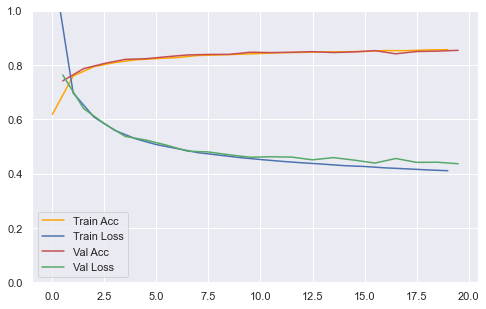

Number of Layers = 2
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 1.1838 - accuracy: 0.6066 - val_loss: 0.7562 - val_accuracy: 0.7450
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6796 - accuracy: 0.7600 - val_loss: 0.6161 - val_accuracy: 0.7858
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5853 - accuracy: 0.7943 - val_loss: 0.5662 - val_accuracy: 0.8023
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.8102 - val_loss: 0.5377 - val_accuracy: 0.8103
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5101 - accuracy: 0.8183 - val_loss: 0.5006 - val_accuracy: 0.8283
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4881 - accuracy: 0.8258 - val_loss: 0.4854 - val_accuracy: 0.8348
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4721 - accuracy: 0.8307 - val_loss: 0.4974 - val_ac

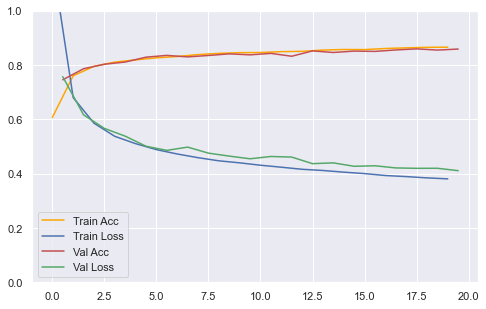

Number of Layers = 3
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 1.2339 - accuracy: 0.5588 - val_loss: 0.7928 - val_accuracy: 0.7102
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.7041 - accuracy: 0.7485 - val_loss: 0.6391 - val_accuracy: 0.7768
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6016 - accuracy: 0.7872 - val_loss: 0.5791 - val_accuracy: 0.7978
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5490 - accuracy: 0.8045 - val_loss: 0.5594 - val_accuracy: 0.8003
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5155 - accuracy: 0.8155 - val_loss: 0.5052 - val_accuracy: 0.8237
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4899 - accuracy: 0.8262 - val_loss: 0.4868 - val_accuracy: 0.8322
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.8339 - val_loss: 0.4666 - val_ac

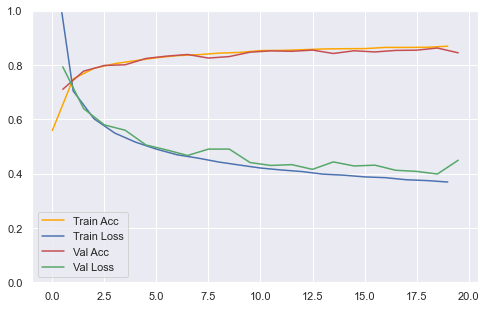

Number of Layers = 4
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 1.2516 - accuracy: 0.5664 - val_loss: 0.7806 - val_accuracy: 0.7177
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.7071 - accuracy: 0.7350 - val_loss: 0.6378 - val_accuracy: 0.7713
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6071 - accuracy: 0.7744 - val_loss: 0.5863 - val_accuracy: 0.7833
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.7962 - val_loss: 0.5222 - val_accuracy: 0.8202
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.8102 - val_loss: 0.5121 - val_accuracy: 0.8228
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5057 - accuracy: 0.8170 - val_loss: 0.5011 - val_accuracy: 0.8250
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4885 - accuracy: 0.8251 - val_loss: 0.4840 - val_ac

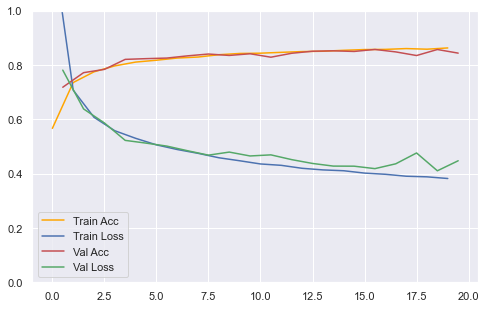

In [66]:
res=[]
for n in [1, 2, 3, 4]:
    print(f'Number of Layers = {n}')
    valacc, testacc, history, model = do_all(hiddensizes[:n], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[n,valacc,testacc]]

In [67]:
print(res)

[[1, 0.8535000085830688, 0.8388000130653381], [2, 0.8588333129882812, 0.8478999733924866], [3, 0.8619999885559082, 0.832099974155426], [4, 0.8566666841506958, 0.8295000195503235]]


#### Optimizer

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 1.4275 - accuracy: 0.5077 - val_loss: 0.8460 - val_accuracy: 0.6992
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.7374 - accuracy: 0.7405 - val_loss: 0.6349 - val_accuracy: 0.7828
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6018 - accuracy: 0.7885 - val_loss: 0.5625 - val_accuracy: 0.8065
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.8098 - val_loss: 0.5161 - val_accuracy: 0.8213
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5127 - accuracy: 0.8202 - val_loss: 0.5089 - val_accuracy: 0.8222
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4881 - accuracy: 0.8283 - val_loss: 0.4911 - val_accuracy: 0.8285
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4711 - accuracy: 0.8330 - val_loss: 0.4770 - val_accuracy: 0.8345
Epoch 

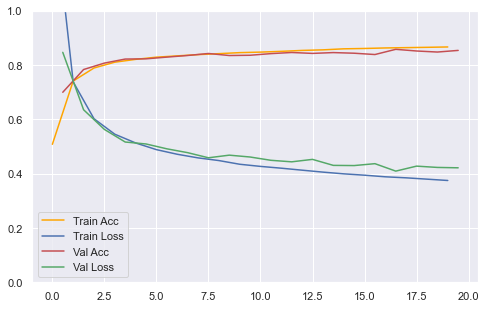

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.6865 - accuracy: 0.7465 - val_loss: 0.5697 - val_accuracy: 0.7925
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5401 - accuracy: 0.8076 - val_loss: 0.5099 - val_accuracy: 0.8233
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5134 - accuracy: 0.8136 - val_loss: 0.5107 - val_accuracy: 0.8158
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4952 - accuracy: 0.8235 - val_loss: 0.5160 - val_accuracy: 0.8225
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4881 - accuracy: 0.8264 - val_loss: 0.5203 - val_accuracy: 0.8177
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4754 - accuracy: 0.8332 - val_loss: 0.5026 - val_accuracy: 0.8285
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4673 - accuracy: 0.8310 - val_loss: 0.5087 - val_accuracy: 0.8312
Epoch 

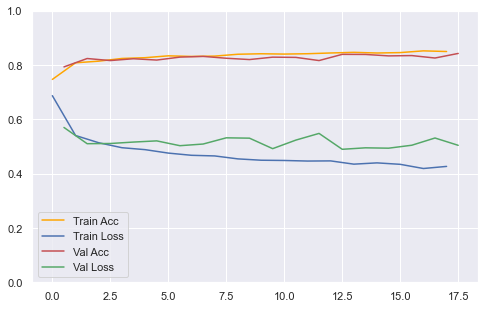

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.7744 - accuracy: 0.7141 - val_loss: 0.5634 - val_accuracy: 0.8010
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5865 - accuracy: 0.7927 - val_loss: 0.5812 - val_accuracy: 0.8012
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5683 - accuracy: 0.8003 - val_loss: 0.5398 - val_accuracy: 0.8172
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5676 - accuracy: 0.8059 - val_loss: 0.5369 - val_accuracy: 0.8177
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5661 - accuracy: 0.8089 - val_loss: 0.6691 - val_accuracy: 0.8087
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5642 - accuracy: 0.8121 - val_loss: 0.5662 - val_accuracy: 0.8223
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5611 - accuracy: 0.8114 - val_loss: 0.6825 - val_accuracy: 0.7910
Epoch 

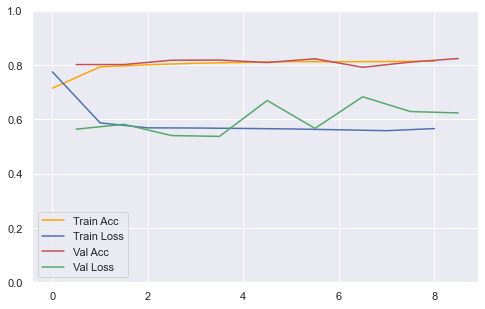

In [68]:
n = 2
res=[]
for optimizer in [keras.optimizers.SGD, keras.optimizers.Adam, keras.optimizers.RMSprop]:
    valacc, testacc, history, model = do_all(hiddensizes[:n], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[optimizer,valacc,testacc]]

In [69]:
print(res)

[[<class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>, 0.8571666479110718, 0.8435999751091003], [<class 'keras.optimizers.optimizer_v2.adam.Adam'>, 0.8420000076293945, 0.8245000243186951], [<class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 0.8233333230018616, 0.8064000010490417]]


#### Learning rate

Epoch 1/20
750/750 [==============================] - 3s 2ms/step - loss: 2.4397 - accuracy: 0.1891 - val_loss: 1.7682 - val_accuracy: 0.1913
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 1.8567 - accuracy: 0.1887 - val_loss: 1.8709 - val_accuracy: 0.1697
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 2.0259 - accuracy: 0.1543 - val_loss: 2.3292 - val_accuracy: 0.0933
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 2.3167 - accuracy: 0.1008 - val_loss: 2.3180 - val_accuracy: 0.1028
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 2.3165 - accuracy: 0.0963 - val_loss: 2.3084 - val_accuracy: 0.1020
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 2.3165 - accuracy: 0.0972 - val_loss: 2.3195 - val_accuracy: 0.0933


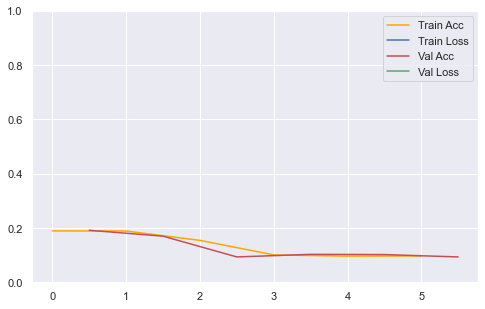

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 1.6040 - accuracy: 0.3916 - val_loss: 1.2515 - val_accuracy: 0.4722
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 1.2712 - accuracy: 0.4755 - val_loss: 1.4974 - val_accuracy: 0.5072
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 1.3400 - accuracy: 0.4652 - val_loss: 1.2911 - val_accuracy: 0.4550
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 1.3533 - accuracy: 0.4596 - val_loss: 1.2798 - val_accuracy: 0.4995
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 1.3790 - accuracy: 0.4457 - val_loss: 1.3329 - val_accuracy: 0.4920
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 1.6089 - accuracy: 0.3236 - val_loss: 1.4932 - val_accuracy: 0.3263


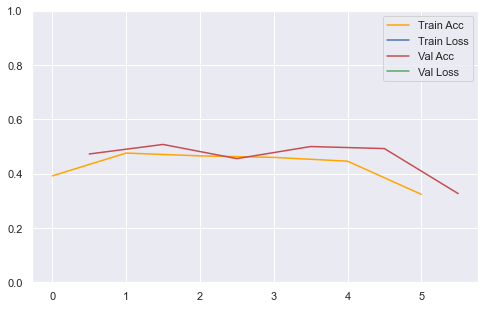

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.8191 - accuracy: 0.7133 - val_loss: 0.6034 - val_accuracy: 0.7655
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5069 - accuracy: 0.8182 - val_loss: 0.4571 - val_accuracy: 0.8408
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4510 - accuracy: 0.8371 - val_loss: 0.4535 - val_accuracy: 0.8388
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4203 - accuracy: 0.8477 - val_loss: 0.4197 - val_accuracy: 0.8487
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3986 - accuracy: 0.8545 - val_loss: 0.4112 - val_accuracy: 0.8552
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.8603 - val_loss: 0.4138 - val_accuracy: 0.8557
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3713 - accuracy: 0.8635 - val_loss: 0.3981 - val_accuracy: 0.8580
Epoch 

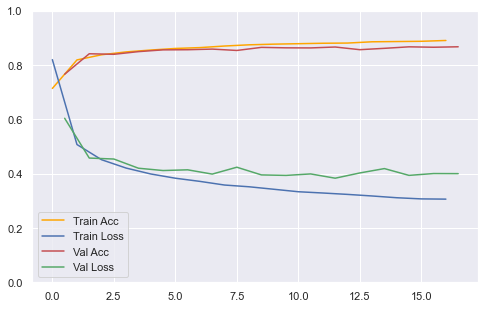

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.7592 - accuracy: 0.7143 - val_loss: 0.6301 - val_accuracy: 0.7572
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.8044 - val_loss: 0.4960 - val_accuracy: 0.8267
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5091 - accuracy: 0.8204 - val_loss: 0.4856 - val_accuracy: 0.8343
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4970 - accuracy: 0.8255 - val_loss: 0.4880 - val_accuracy: 0.8315
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4837 - accuracy: 0.8323 - val_loss: 0.5250 - val_accuracy: 0.8208
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4709 - accuracy: 0.8323 - val_loss: 0.5141 - val_accuracy: 0.8272
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4668 - accuracy: 0.8361 - val_loss: 0.5669 - val_accuracy: 0.8227
Epoch 

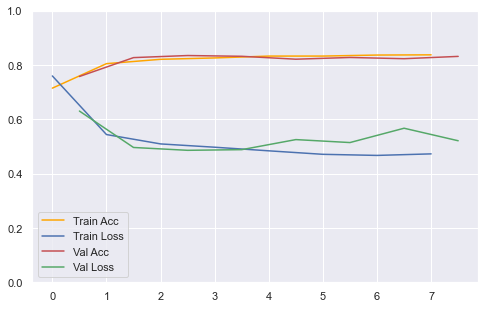

In [70]:
res=[]
n = 2
for lr in [10, 5, 0.1, 0.5]:
    valacc, testacc, history, model = do_all(hiddensizes, actfn, optimizer, lr*learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[lr*learningrate,valacc]]

In [71]:
print(res)

[[0.1, 0.1913333386182785], [0.05, 0.5071666836738586], [0.001, 0.8665000200271606], [0.005, 0.8343333601951599]]


### 3.2 CNN

In [72]:
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=2))          
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
        model.add(keras.layers.MaxPooling2D(pool_size=2))          
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
    model.add(keras.layers.Flatten())                          
    model.add(keras.layers.Dense(10, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

In [73]:
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train[:n_train,:,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_valid[:n_valid,:,:,:], y_valid[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    testres = model.evaluate(X_test, y_test, verbose=0)
    return (max_val_acc, testres[1], history, model)

#### Hiddensizes

Number of Layers = 1
Epoch 1/20
750/750 [==============================] - 10s 12ms/step - loss: 0.4962 - accuracy: 0.8280 - val_loss: 0.3967 - val_accuracy: 0.8572
Epoch 2/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3600 - accuracy: 0.8739 - val_loss: 0.3516 - val_accuracy: 0.8743
Epoch 3/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3334 - accuracy: 0.8832 - val_loss: 0.3620 - val_accuracy: 0.8678
Epoch 4/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3238 - accuracy: 0.8855 - val_loss: 0.3443 - val_accuracy: 0.8782
Epoch 5/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3172 - accuracy: 0.8908 - val_loss: 0.3856 - val_accuracy: 0.8805
Epoch 6/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3192 - accuracy: 0.8904 - val_loss: 0.3765 - val_accuracy: 0.8763
Epoch 7/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3178 - accuracy: 0.8897 - val_loss: 0.5319 

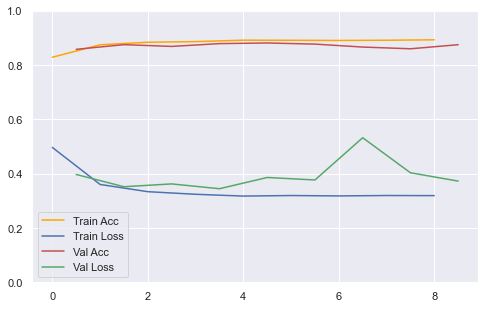

Number of Layers = 2
Epoch 1/20
750/750 [==============================] - 10s 13ms/step - loss: 0.5216 - accuracy: 0.8216 - val_loss: 0.3595 - val_accuracy: 0.8753
Epoch 2/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3590 - accuracy: 0.8749 - val_loss: 0.3350 - val_accuracy: 0.8802
Epoch 3/20
750/750 [==============================] - 12s 17ms/step - loss: 0.3364 - accuracy: 0.8834 - val_loss: 0.3521 - val_accuracy: 0.8848
Epoch 4/20
750/750 [==============================] - 13s 17ms/step - loss: 0.3213 - accuracy: 0.8889 - val_loss: 0.3521 - val_accuracy: 0.8725
Epoch 5/20
750/750 [==============================] - 12s 16ms/step - loss: 0.3158 - accuracy: 0.8900 - val_loss: 0.4164 - val_accuracy: 0.8540
Epoch 6/20
750/750 [==============================] - 12s 16ms/step - loss: 0.3159 - accuracy: 0.8920 - val_loss: 0.3606 - val_accuracy: 0.8782
Epoch 7/20
750/750 [==============================] - 11s 14ms/step - loss: 0.3155 - accuracy: 0.8906 - val_loss: 0

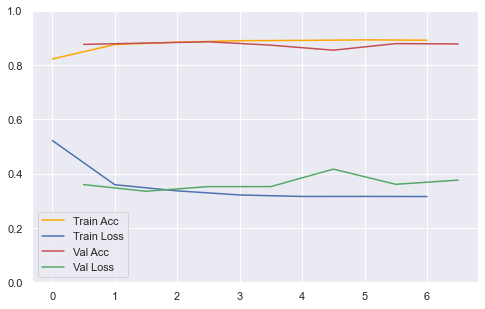

Number of Layers = 3
Epoch 1/20
750/750 [==============================] - 11s 14ms/step - loss: 0.5237 - accuracy: 0.8133 - val_loss: 0.3739 - val_accuracy: 0.8668
Epoch 2/20
750/750 [==============================] - 10s 14ms/step - loss: 0.3896 - accuracy: 0.8600 - val_loss: 0.3833 - val_accuracy: 0.8712
Epoch 3/20
750/750 [==============================] - 10s 13ms/step - loss: 0.3876 - accuracy: 0.8627 - val_loss: 0.3805 - val_accuracy: 0.8687
Epoch 4/20
750/750 [==============================] - 13s 17ms/step - loss: 0.3822 - accuracy: 0.8646 - val_loss: 0.3873 - val_accuracy: 0.8640
Epoch 5/20
750/750 [==============================] - 11s 14ms/step - loss: 0.3810 - accuracy: 0.8656 - val_loss: 0.4097 - val_accuracy: 0.8485
Epoch 6/20
750/750 [==============================] - 11s 14ms/step - loss: 0.3873 - accuracy: 0.8637 - val_loss: 0.4335 - val_accuracy: 0.8582


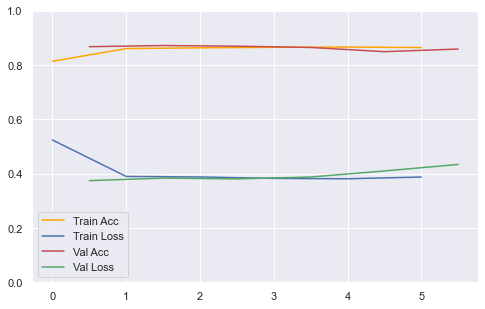

Number of Layers = 4
Epoch 1/20
750/750 [==============================] - 12s 16ms/step - loss: 0.5882 - accuracy: 0.7968 - val_loss: 0.4249 - val_accuracy: 0.8440
Epoch 2/20
750/750 [==============================] - 13s 17ms/step - loss: 0.3956 - accuracy: 0.8612 - val_loss: 0.3968 - val_accuracy: 0.8550
Epoch 3/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3807 - accuracy: 0.8646 - val_loss: 0.3550 - val_accuracy: 0.8707
Epoch 4/20
750/750 [==============================] - 13s 18ms/step - loss: 0.3741 - accuracy: 0.8647 - val_loss: 0.3823 - val_accuracy: 0.8603
Epoch 5/20
750/750 [==============================] - 18s 24ms/step - loss: 0.3678 - accuracy: 0.8652 - val_loss: 0.3866 - val_accuracy: 0.8693
Epoch 6/20
750/750 [==============================] - 15s 20ms/step - loss: 0.3721 - accuracy: 0.8666 - val_loss: 0.3666 - val_accuracy: 0.8698
Epoch 7/20
750/750 [==============================] - 13s 18ms/step - loss: 0.3686 - accuracy: 0.8644 - val_loss: 0

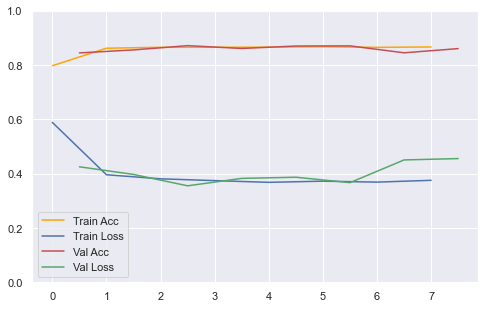

[[1, 0.8805000185966492, 0.8715999722480774], [2, 0.8848333358764648, 0.8669000267982483], [3, 0.8711666464805603, 0.857699990272522], [4, 0.8706666827201843, 0.8629000186920166]]


In [74]:
res=[]
for n in [1, 2, 3, 4]:
    print(f'Number of Layers = {n}')
    valacc, testacc, history, model = do_all(hiddensizes[:n], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[n,valacc,testacc]]


In [75]:
print(res)

[[1, 0.8805000185966492, 0.8715999722480774], [2, 0.8848333358764648, 0.8669000267982483], [3, 0.8711666464805603, 0.857699990272522], [4, 0.8706666827201843, 0.8629000186920166]]


#### Optimizer

Epoch 1/20
750/750 [==============================] - 9s 11ms/step - loss: 0.9158 - accuracy: 0.6839 - val_loss: 0.6966 - val_accuracy: 0.7672
Epoch 2/20
750/750 [==============================] - 11s 14ms/step - loss: 0.5949 - accuracy: 0.7923 - val_loss: 0.5357 - val_accuracy: 0.8177
Epoch 3/20
750/750 [==============================] - 10s 13ms/step - loss: 0.5137 - accuracy: 0.8176 - val_loss: 0.4833 - val_accuracy: 0.8342
Epoch 4/20
750/750 [==============================] - 9s 12ms/step - loss: 0.4712 - accuracy: 0.8320 - val_loss: 0.4380 - val_accuracy: 0.8540
Epoch 5/20
750/750 [==============================] - 10s 13ms/step - loss: 0.4421 - accuracy: 0.8456 - val_loss: 0.4391 - val_accuracy: 0.8492
Epoch 6/20
750/750 [==============================] - 10s 13ms/step - loss: 0.4166 - accuracy: 0.8553 - val_loss: 0.4133 - val_accuracy: 0.8567
Epoch 7/20
750/750 [==============================] - 9s 12ms/step - loss: 0.4024 - accuracy: 0.8587 - val_loss: 0.3960 - val_accuracy: 0.

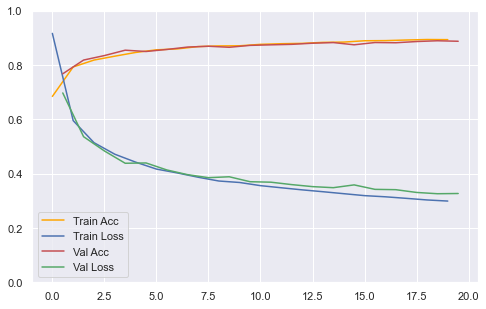

Epoch 1/20
750/750 [==============================] - 9s 12ms/step - loss: 0.4781 - accuracy: 0.8314 - val_loss: 0.3999 - val_accuracy: 0.8615
Epoch 2/20
750/750 [==============================] - 9s 11ms/step - loss: 0.3499 - accuracy: 0.8717 - val_loss: 0.3506 - val_accuracy: 0.8720
Epoch 3/20
750/750 [==============================] - 9s 11ms/step - loss: 0.3100 - accuracy: 0.8848 - val_loss: 0.3317 - val_accuracy: 0.8810
Epoch 4/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2886 - accuracy: 0.8944 - val_loss: 0.3505 - val_accuracy: 0.8830
Epoch 5/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2647 - accuracy: 0.9035 - val_loss: 0.3465 - val_accuracy: 0.8805
Epoch 6/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2556 - accuracy: 0.9075 - val_loss: 0.3557 - val_accuracy: 0.8817
Epoch 7/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2405 - accuracy: 0.9115 - val_loss: 0.3624 - val_accuracy: 0.881

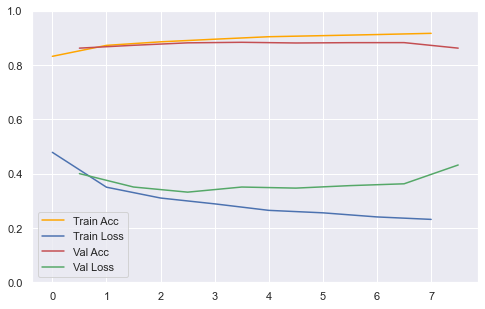

Epoch 1/20
750/750 [==============================] - 9s 12ms/step - loss: 0.4941 - accuracy: 0.8274 - val_loss: 0.3476 - val_accuracy: 0.8780
Epoch 2/20
750/750 [==============================] - 10s 13ms/step - loss: 0.3570 - accuracy: 0.8764 - val_loss: 0.3546 - val_accuracy: 0.8765
Epoch 3/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3383 - accuracy: 0.8792 - val_loss: 0.3475 - val_accuracy: 0.8702
Epoch 4/20
750/750 [==============================] - 9s 11ms/step - loss: 0.3290 - accuracy: 0.8848 - val_loss: 0.3520 - val_accuracy: 0.8815
Epoch 5/20
750/750 [==============================] - 8s 11ms/step - loss: 0.3283 - accuracy: 0.8861 - val_loss: 0.3601 - val_accuracy: 0.8775
Epoch 6/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3238 - accuracy: 0.8860 - val_loss: 0.3544 - val_accuracy: 0.8783
Epoch 7/20
750/750 [==============================] - 9s 11ms/step - loss: 0.3192 - accuracy: 0.8888 - val_loss: 0.3872 - val_accuracy: 0.867

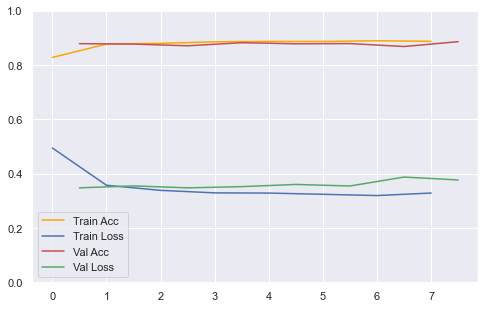

In [76]:
n = 1
res=[]
for optimizer in [keras.optimizers.SGD, keras.optimizers.Adam, keras.optimizers.RMSprop]:
    valacc, testacc, history, model = do_all(hiddensizes[:n], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[optimizer,valacc,testacc]]

In [77]:
print(res)

[[<class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>, 0.8886666893959045, 0.8823999762535095], [<class 'keras.optimizers.optimizer_v2.adam.Adam'>, 0.8830000162124634, 0.8779000043869019], [<class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 0.8853333592414856, 0.861299991607666]]


#### Learning rate

Epoch 1/20
750/750 [==============================] - 12s 15ms/step - loss: 23.6944 - accuracy: 0.5846 - val_loss: 0.8799 - val_accuracy: 0.7008
Epoch 2/20
750/750 [==============================] - 11s 14ms/step - loss: 2.1940 - accuracy: 0.1550 - val_loss: 2.3200 - val_accuracy: 0.1072
Epoch 3/20
750/750 [==============================] - 11s 15ms/step - loss: 2.3160 - accuracy: 0.0993 - val_loss: 2.3176 - val_accuracy: 0.0973
Epoch 4/20
750/750 [==============================] - 11s 15ms/step - loss: 2.3152 - accuracy: 0.1013 - val_loss: 2.3146 - val_accuracy: 0.1072
Epoch 5/20
750/750 [==============================] - 11s 15ms/step - loss: 2.3165 - accuracy: 0.1019 - val_loss: 2.3143 - val_accuracy: 0.1028
Epoch 6/20
750/750 [==============================] - 11s 15ms/step - loss: 2.3165 - accuracy: 0.1002 - val_loss: 2.3131 - val_accuracy: 0.0982


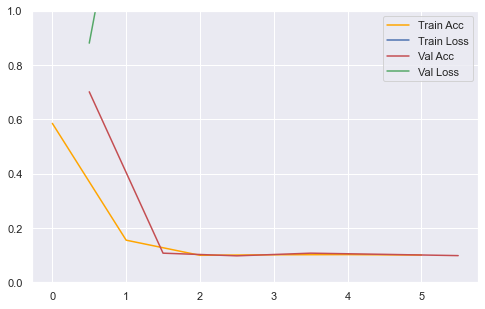

Epoch 1/20
750/750 [==============================] - 12s 15ms/step - loss: 0.6304 - accuracy: 0.7662 - val_loss: 0.4242 - val_accuracy: 0.8515
Epoch 2/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3930 - accuracy: 0.8605 - val_loss: 0.3727 - val_accuracy: 0.8655
Epoch 3/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3384 - accuracy: 0.8771 - val_loss: 0.3353 - val_accuracy: 0.8833
Epoch 4/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3081 - accuracy: 0.8889 - val_loss: 0.3187 - val_accuracy: 0.8838
Epoch 5/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2882 - accuracy: 0.8970 - val_loss: 0.3012 - val_accuracy: 0.8892
Epoch 6/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2710 - accuracy: 0.9024 - val_loss: 0.2974 - val_accuracy: 0.8943
Epoch 7/20
750/750 [==============================] - 11s 15ms/step - loss: 0.2553 - accuracy: 0.9080 - val_loss: 0.2887 - val_accuracy:

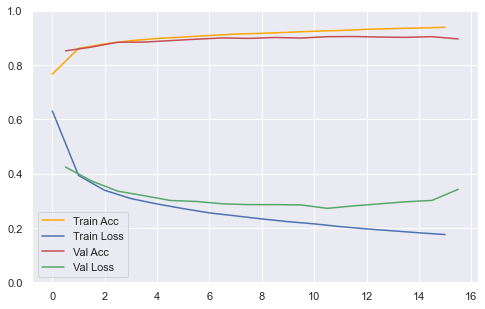

Epoch 1/20
750/750 [==============================] - 13s 17ms/step - loss: 0.7459 - accuracy: 0.7369 - val_loss: 0.5071 - val_accuracy: 0.8230
Epoch 2/20
750/750 [==============================] - 11s 15ms/step - loss: 0.4604 - accuracy: 0.8332 - val_loss: 0.4136 - val_accuracy: 0.8500
Epoch 3/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3990 - accuracy: 0.8556 - val_loss: 0.3708 - val_accuracy: 0.8697
Epoch 4/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3642 - accuracy: 0.8691 - val_loss: 0.3571 - val_accuracy: 0.8760
Epoch 5/20
750/750 [==============================] - 12s 16ms/step - loss: 0.3408 - accuracy: 0.8771 - val_loss: 0.3500 - val_accuracy: 0.8777
Epoch 6/20
750/750 [==============================] - 11s 15ms/step - loss: 0.3221 - accuracy: 0.8817 - val_loss: 0.3306 - val_accuracy: 0.8867
Epoch 7/20
750/750 [==============================] - 12s 16ms/step - loss: 0.3086 - accuracy: 0.8890 - val_loss: 0.3316 - val_accuracy:

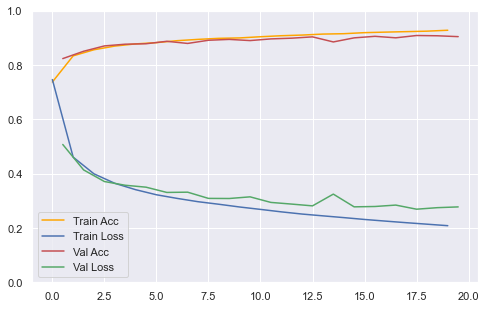

In [80]:
n = 1
res=[]
for lr in [10, 0.1, 0.05]:
    valacc, testacc, history, model = do_all(hiddensizes, actfn, optimizer, lr*learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[lr*learningrate,valacc,testacc]]

In [81]:
print(res)

[[0.1, 0.7008333206176758, 0.6888999938964844], [0.001, 0.9043333530426025, 0.8968999981880188], [0.0005, 0.9079999923706055, 0.8949999809265137]]


### 3.3 ResNet

In [103]:
# Implementation example of Geron: Hands On Machine Learning 2019, Chapter 14
class ResidualUnit (keras.layers.Layer): 
    def __init__ (self, filters, strides=1, activation="relu", **kwargs): 
        super(). __init__ (**kwargs) 
        self.activation = keras.activations.get(activation) 
        self.main_layers = [ 
            keras.layers.Conv2D(filters, 3, strides=strides, 
                                padding="same", use_bias=False), 
            keras.layers.BatchNormalization(), 
            self.activation, 
            keras.layers.Conv2D(filters, 3, strides=1, 
                                padding="same", use_bias=False), 
            keras.layers.BatchNormalization()] 
        self.skip_layers = [] 
        if strides > 1: 
            self.skip_layers = [ 
                keras.layers.Conv2D(filters, 1, strides=strides, 
                                    padding="same", use_bias=False), 
                keras.layers.BatchNormalization()] 
            
    def call(self, inputs): 
        Z = inputs 
        for layer in self.main_layers: 
            Z = layer(Z) 
        skip_Z = inputs 
        for layer in self.skip_layers: 
            skip_Z = layer(skip_Z) 
        return self.activation(Z + skip_Z)

In [104]:
initial_filters=32
residual_unit_filters=[32, 64, 128]

model = keras.models.Sequential() 
model.add(keras.layers.Conv2D(initial_filters, 7, strides=2, 
                              input_shape=[28, 28, 1], 
                              padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Activation(actfn)) 
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same")) 

prev_filters = initial_filters
for filters in residual_unit_filters: 
    if filters == prev_filters: 
        strides = 1
    else:
        strides = 2
    model.add(ResidualUnit(filters, strides=strides)) 
    prev_filters = filters 
    
model.add(keras.layers.GlobalAvgPool2D()) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(25, activation="softmax"))

#### Optimizer

Epoch 1/20
750/750 [==============================] - 25s 30ms/step - loss: 0.2359 - accuracy: 0.9159 - val_loss: 0.3018 - val_accuracy: 0.8897
Epoch 2/20
750/750 [==============================] - 23s 30ms/step - loss: 0.2193 - accuracy: 0.9206 - val_loss: 0.3159 - val_accuracy: 0.8893
Epoch 3/20
750/750 [==============================] - 23s 31ms/step - loss: 0.2028 - accuracy: 0.9270 - val_loss: 0.3133 - val_accuracy: 0.8903
Epoch 4/20
750/750 [==============================] - 23s 31ms/step - loss: 0.1925 - accuracy: 0.9308 - val_loss: 0.3039 - val_accuracy: 0.8902
Epoch 5/20
750/750 [==============================] - 23s 31ms/step - loss: 0.1747 - accuracy: 0.9372 - val_loss: 0.3176 - val_accuracy: 0.8872
Epoch 6/20
750/750 [==============================] - 25s 34ms/step - loss: 0.1633 - accuracy: 0.9426 - val_loss: 0.3113 - val_accuracy: 0.8927


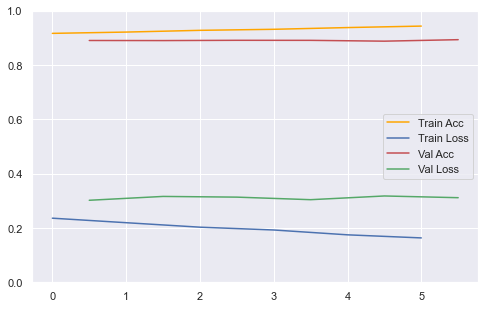

Epoch 1/20
750/750 [==============================] - 24s 31ms/step - loss: 0.5224 - accuracy: 0.8089 - val_loss: 0.4679 - val_accuracy: 0.8288
Epoch 2/20
750/750 [==============================] - 23s 31ms/step - loss: 0.3685 - accuracy: 0.8626 - val_loss: 0.4032 - val_accuracy: 0.8562
Epoch 3/20
750/750 [==============================] - 23s 31ms/step - loss: 0.3218 - accuracy: 0.8802 - val_loss: 0.3370 - val_accuracy: 0.8745
Epoch 4/20
750/750 [==============================] - 23s 31ms/step - loss: 0.2953 - accuracy: 0.8898 - val_loss: 0.3124 - val_accuracy: 0.8785
Epoch 5/20
750/750 [==============================] - 23s 31ms/step - loss: 0.2754 - accuracy: 0.8988 - val_loss: 0.3443 - val_accuracy: 0.8768
Epoch 6/20
750/750 [==============================] - 23s 31ms/step - loss: 0.2565 - accuracy: 0.9027 - val_loss: 0.2944 - val_accuracy: 0.8925
Epoch 7/20
750/750 [==============================] - 24s 31ms/step - loss: 0.2380 - accuracy: 0.9100 - val_loss: 0.3255 - val_accuracy:

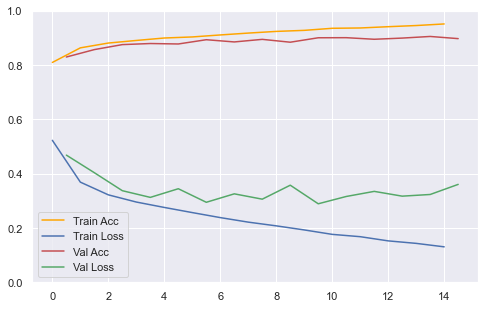

Epoch 1/20
750/750 [==============================] - 26s 33ms/step - loss: 0.1855 - accuracy: 0.9307 - val_loss: 0.3673 - val_accuracy: 0.9028
Epoch 2/20
750/750 [==============================] - 24s 32ms/step - loss: 0.1728 - accuracy: 0.9377 - val_loss: 0.4999 - val_accuracy: 0.8813
Epoch 3/20
750/750 [==============================] - 24s 32ms/step - loss: 0.1672 - accuracy: 0.9383 - val_loss: 0.4604 - val_accuracy: 0.8963
Epoch 4/20
750/750 [==============================] - 24s 32ms/step - loss: 0.1639 - accuracy: 0.9431 - val_loss: 0.4961 - val_accuracy: 0.9015
Epoch 5/20
750/750 [==============================] - 24s 32ms/step - loss: 0.1533 - accuracy: 0.9442 - val_loss: 0.4424 - val_accuracy: 0.8960
Epoch 6/20
750/750 [==============================] - 25s 33ms/step - loss: 0.1509 - accuracy: 0.9485 - val_loss: 0.4543 - val_accuracy: 0.8885


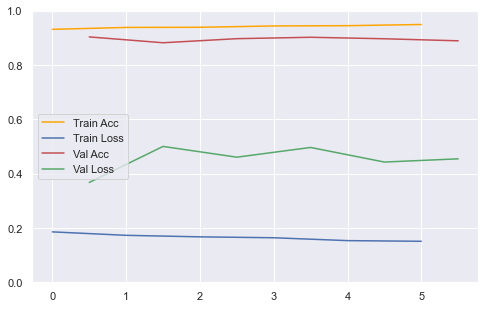

In [106]:
res=[]
for optimizer in [keras.optimizers.SGD, keras.optimizers.Adam, keras.optimizers.RMSprop]:
    model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer(learning_rate=learningrate), 
              metrics=["accuracy"]) 
    valacc, testacc, history, model = fit_evaluate(model, n_train, n_valid, 
                                               n_epochs, batch_size, callbacks=early_stopping_cb)


    plot_history(history)
    res += [[optimizer, valacc, testacc]]

In [107]:
print(res)

[[<class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>, 0.8926666378974915, 0.8773999810218811], [<class 'keras.optimizers.optimizer_v2.adam.Adam'>, 0.9045000076293945, 0.8932999968528748], [<class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 0.9028333425521851, 0.8914999961853027]]


#### Learning rate

In [108]:
optimizer = keras.optimizers.Adam
res = []
for lr in [10,  0.1, 0.01]:
    model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer(learning_rate=lr*learningrate), 
              metrics=["accuracy"]) 
    valacc, testacc, history, model = fit_evaluate(model, n_train, n_valid, 
                                               n_epochs, batch_size, callbacks=early_stopping_cb)

    
    res += [[lr*learningrate,valacc,testacc]]

Epoch 1/20
750/750 [==============================] - 28s 36ms/step - loss: 0.5223 - accuracy: 0.8139 - val_loss: 0.5483 - val_accuracy: 0.8218
Epoch 2/20
750/750 [==============================] - 23s 31ms/step - loss: 0.4181 - accuracy: 0.8504 - val_loss: 0.4081 - val_accuracy: 0.8632
Epoch 3/20
750/750 [==============================] - 24s 31ms/step - loss: 0.3681 - accuracy: 0.8653 - val_loss: 0.4737 - val_accuracy: 0.8502
Epoch 4/20
750/750 [==============================] - 24s 31ms/step - loss: 0.3561 - accuracy: 0.8717 - val_loss: 0.4665 - val_accuracy: 0.8367
Epoch 5/20
750/750 [==============================] - 24s 31ms/step - loss: 0.3334 - accuracy: 0.8807 - val_loss: 0.3540 - val_accuracy: 0.8640
Epoch 6/20
750/750 [==============================] - 24s 32ms/step - loss: 0.3242 - accuracy: 0.8839 - val_loss: 0.3816 - val_accuracy: 0.8745
Epoch 7/20
750/750 [==============================] - 23s 31ms/step - loss: 0.3131 - accuracy: 0.8843 - val_loss: 0.3763 - val_accuracy:

In [109]:
print(res)

[[0.1, 0.9006666541099548, 0.8891000151634216], [0.001, 0.9123333096504211, 0.9004999995231628], [0.0001, 0.9131666421890259, 0.9016000032424927]]


### 4. Best model

#### 4.1 Best MLP

In [118]:
mlp = keras.models.Sequential()   # This is a style of building networks - the easiest option
mlp.add(keras.layers.Flatten(input_shape = [28 , 28])) 
mlp.add(keras.layers.Dense(400, activation = "relu"))    # first hidden layer
mlp.add(keras.layers.Dense(200, activation = "relu"))    # second hidden layer
mlp.add(keras.layers.Dense(10, activation = "softmax"))  # output layer
mlp.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_69 (Flatten)        (None, 784)               0         
                                                                 
 dense_177 (Dense)           (None, 400)               314000    
                                                                 
 dense_178 (Dense)           (None, 200)               80200     
                                                                 
 dense_179 (Dense)           (None, 10)                2010      
                                                                 
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [119]:
mlp.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = mlp.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7475 - accuracy: 0.7590 - val_loss: 0.5179 - val_accuracy: 0.8288
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4951 - accuracy: 0.8292 - val_loss: 0.4872 - val_accuracy: 0.8298
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4485 - accuracy: 0.8432 - val_loss: 0.4296 - val_accuracy: 0.8521
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4204 - accuracy: 0.8535 - val_loss: 0.4230 - val_accuracy: 0.8537
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3996 - accuracy: 0.8601 - val_loss: 0.3959 - val_accuracy: 0.8665
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3833 - accuracy: 0.8656 - val_loss: 0.4069 - val_accuracy: 0.8559
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3691 - accuracy: 0.8704 - val_loss: 0.3724 - val_accuracy:

In [120]:
test_result = mlp.evaluate(X_test, y_test, verbose=0)
print(test_result)

[0.3490227162837982, 0.8748999834060669]


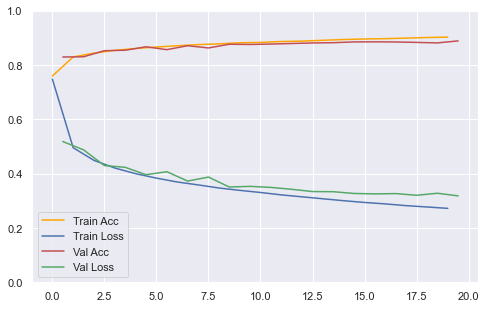

In [121]:
plot_history(history)

In [122]:
predict_x = mlp.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)
print(y_pred)   # predicted classes
print(classification_report(y_test,y_pred, target_names=class_names, digits=4))


313/313 [==============================] - 1s 2ms/step
[9 2 1 ... 8 1 5]
              precision    recall  f1-score   support

 T-shirt/top     0.7903    0.8820    0.8336      1000
     Trouser     0.9917    0.9600    0.9756      1000
    Pullover     0.7780    0.7990    0.7884      1000
       Dress     0.8446    0.9130    0.8775      1000
        Coat     0.8276    0.7490    0.7864      1000
      Sandal     0.9568    0.9530    0.9549      1000
       Shirt     0.7186    0.6360    0.6748      1000
     Sneaker     0.9355    0.9290    0.9323      1000
         Bag     0.9575    0.9680    0.9627      1000
  Ankle boot     0.9430    0.9600    0.9514      1000

    accuracy                         0.8749     10000
   macro avg     0.8744    0.8749    0.8738     10000
weighted avg     0.8744    0.8749    0.8738     10000



#### 4.2 Best CNN

In [110]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu", padding="same",
                               input_shape=[28, 28, 1]))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"))
cnn.add(keras.layers.AveragePooling2D(pool_size=2))
cnn.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
cnn.add(keras.layers.AveragePooling2D(pool_size=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(10, activation = "softmax"))
cnn.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_112 (Conv2D)         (None, 14, 14, 32)        9248      
                                                                 
 average_pooling2d_6 (Averag  (None, 7, 7, 32)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_113 (Conv2D)         (None, 7, 7, 64)          18496     
                                                                 
 average_pooling2d_7 (Averag  (None, 3, 3, 64)       

In [112]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = cnn.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
1500/1500 [==============================] - 37s 25ms/step - loss: 0.4149 - accuracy: 0.8490 - val_loss: 0.3461 - val_accuracy: 0.8731
Epoch 2/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3429 - accuracy: 0.8764 - val_loss: 0.3553 - val_accuracy: 0.8673
Epoch 3/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3067 - accuracy: 0.8872 - val_loss: 0.2966 - val_accuracy: 0.8927
Epoch 4/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2829 - accuracy: 0.8969 - val_loss: 0.2929 - val_accuracy: 0.8912
Epoch 5/20
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2670 - accuracy: 0.9034 - val_loss: 0.2712 - val_accuracy: 0.9023
Epoch 6/20
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2523 - accuracy: 0.9086 - val_loss: 0.2689 - val_accuracy: 0.9023
Epoch 7/20
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2385 - accuracy: 0.9134 - val_loss: 0.2747 -

In [113]:
test_result = cnn.evaluate(X_test, y_test, verbose=0)
print(test_result)

[0.24368466436862946, 0.9190000295639038]


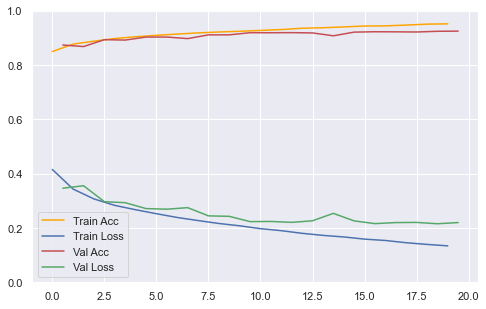

In [115]:
plot_history(history)

In [116]:
predict_x = cnn.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)
print(y_pred)   # predicted classes
print(classification_report(y_test,y_pred, target_names=class_names, digits=4))


313/313 [==============================] - 2s 6ms/step
[9 2 1 ... 8 1 7]
              precision    recall  f1-score   support

 T-shirt/top     0.8435    0.8950    0.8685      1000
     Trouser     0.9930    0.9880    0.9905      1000
    Pullover     0.8504    0.9040    0.8764      1000
       Dress     0.9019    0.9380    0.9196      1000
        Coat     0.8825    0.8640    0.8732      1000
      Sandal     0.9949    0.9780    0.9864      1000
       Shirt     0.8167    0.7130    0.7613      1000
     Sneaker     0.9604    0.9690    0.9647      1000
         Bag     0.9949    0.9840    0.9894      1000
  Ankle boot     0.9673    0.9750    0.9711      1000

    accuracy                         0.9208     10000
   macro avg     0.9206    0.9208    0.9201     10000
weighted avg     0.9206    0.9208    0.9201     10000



#### 4.3 Best ResNet

In [123]:
class ResidualUnit (keras.layers.Layer): 
    def __init__ (self, filters, strides=1, activation="relu", **kwargs): 
        super(). __init__ (**kwargs) 
        self.activation = keras.activations.get(activation) 
        self.main_layers = [ 
            keras.layers.Conv2D(filters, 3, strides=strides, 
                                padding="same", use_bias=False), 
            keras.layers.BatchNormalization(), 
            self.activation, 
            keras.layers.Conv2D(filters, 3, strides=1, 
                                padding="same", use_bias=False), 
            keras.layers.BatchNormalization()] 
        self.skip_layers = [] 
        if strides > 1: 
            self.skip_layers = [ 
                keras.layers.Conv2D(filters, 1, strides=strides, 
                                    padding="same", use_bias=False), 
                keras.layers.BatchNormalization()] 
            
    def call(self, inputs): 
        Z = inputs 
        for layer in self.main_layers: 
            Z = layer(Z) 
        skip_Z = inputs 
        for layer in self.skip_layers: 
            skip_Z = layer(skip_Z) 
        return self.activation(Z + skip_Z)

In [125]:
initial_filters=32
residual_unit_filters=[32, 64, 128]

model = keras.models.Sequential() 
model.add(keras.layers.Conv2D(initial_filters, 7, strides=2, 
                              input_shape=[28, 28, 1], 
                              padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Activation(actfn)) 
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same")) 

prev_filters = initial_filters
for filters in residual_unit_filters: 
    if filters == prev_filters: 
        strides = 1
    else:
        strides = 2
    model.add(ResidualUnit(filters, strides=strides)) 
    prev_filters = filters 
    
model.add(keras.layers.GlobalAvgPool2D()) 
model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(25, activation="softmax"))
model.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_123 (Conv2D)         (None, 14, 14, 32)        1568      
                                                                 
 batch_normalization_65 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 residual_unit_21 (ResidualU  (None, 7, 7, 32)         18688     
 nit)                                                            
                                                     

In [126]:
optimizer = keras.optimizers.Adam

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer(learning_rate=0.0001), 
              metrics=["accuracy"]) 
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
1500/1500 [==============================] - 49s 32ms/step - loss: 0.5510 - accuracy: 0.8184 - val_loss: 0.3751 - val_accuracy: 0.8669
Epoch 2/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3308 - accuracy: 0.8817 - val_loss: 0.3125 - val_accuracy: 0.8855
Epoch 3/20
1500/1500 [==============================] - 47s 32ms/step - loss: 0.2796 - accuracy: 0.9004 - val_loss: 0.3007 - val_accuracy: 0.8874
Epoch 4/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2450 - accuracy: 0.9118 - val_loss: 0.2736 - val_accuracy: 0.9004
Epoch 5/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2223 - accuracy: 0.9203 - val_loss: 0.2652 - val_accuracy: 0.9044
Epoch 6/20
1500/1500 [==============================] - 49s 32ms/step - loss: 0.1970 - accuracy: 0.9283 - val_loss: 0.2774 - val_accuracy: 0.8988
Epoch 7/20
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1758 - accuracy: 0.9365 - val_loss: 0.2768 -

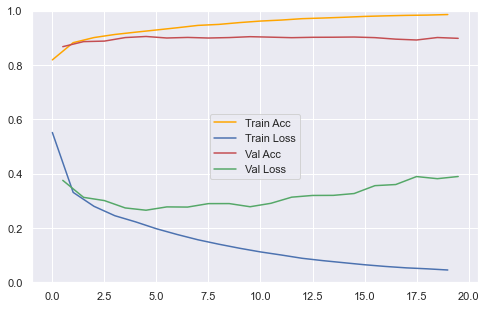

In [127]:
plot_history(history)

In [130]:
test_result = model.evaluate(X_test, y_test, verbose=0)
print(test_result)

[0.4252801239490509, 0.8883000016212463]


In [128]:
predict_x = model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)
print(y_pred)   # predicted classes
print(classification_report(y_test,y_pred, target_names=class_names, digits=4))



313/313 [==============================] - 2s 7ms/step
[9 2 1 ... 8 1 7]
              precision    recall  f1-score   support

 T-shirt/top     0.8292    0.8400    0.8346      1000
     Trouser     0.9888    0.9750    0.9819      1000
    Pullover     0.8615    0.7840    0.8209      1000
       Dress     0.8903    0.8930    0.8917      1000
        Coat     0.7323    0.9000    0.8075      1000
      Sandal     0.9777    0.9630    0.9703      1000
       Shirt     0.7542    0.6350    0.6895      1000
     Sneaker     0.9224    0.9750    0.9480      1000
         Bag     0.9644    0.9760    0.9702      1000
  Ankle boot     0.9782    0.9420    0.9598      1000

    accuracy                         0.8883     10000
   macro avg     0.8899    0.8883    0.8874     10000
weighted avg     0.8899    0.8883    0.8874     10000

